# 0.) Import and Clean data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA

In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/google colab/Country-data.csv", sep = ",")

In [5]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
df.shape

(167, 10)

In [7]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [8]:
country = df[["country"]]
X = df.drop(["country"], axis=1)

In [9]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [11]:
X_scaled

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

# 1.) Run a PCA Algorithm to get 2 Principle Components for the 9 X features

In [12]:
pca = PCA(n_components= 2)
X_pca = pca.fit_transform(X_scaled)

In [14]:
X_pca[:4,:]

array([[-2.91302459,  0.09562058],
       [ 0.42991133, -0.58815567],
       [-0.28522508, -0.45517441],
       [-2.93242265,  1.69555507]])

# 2.) Plot a Scatter plot of the PCs on the axis

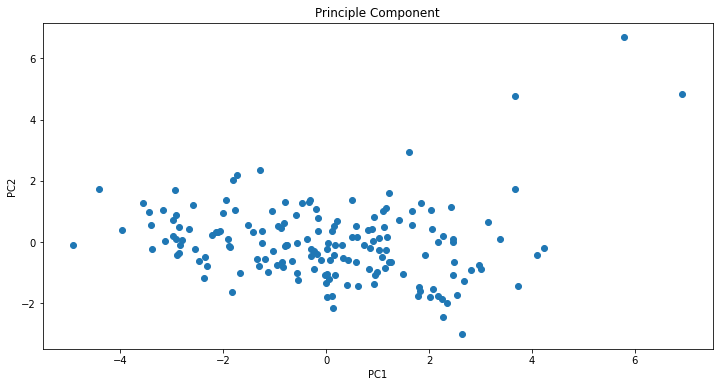

In [16]:
plt.figure(figsize = (12,6))
plt.scatter(x = X_pca[:,0], y= X_pca[:,1] )
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principle Component')
plt.plot;

# 3.) Rank the features in order of importance according to PCA

In [17]:
loadings = pca.components_

In [18]:
loadings

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ]])

In [21]:
np.sum(loadings**2, axis=0)

array([0.21320078, 0.45656697, 0.08184323, 0.47741956, 0.15926317,
       0.03738641, 0.23093748, 0.18709439, 0.15628802])

In [22]:
features_names = df.columns[1:]

In [24]:
features_names

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [27]:
feature_importance = pd.DataFrame(np.sum(loadings**2, axis=0), columns=['Feature Rank'])

In [28]:
feature_importance.index = features_names

In [31]:
feature_importance.sort_values('Feature Rank',ascending=False)

,Feature Rank
imports,0.477420
exports,0.456567
life_expec,0.230937
child_mort,0.213201
total_fer,0.187094
income,0.159263
gdpp,0.156288
health,0.081843
inflation,0.037386


# 4.) Plot a heatmap of the feature importance (Fill in all parameters)

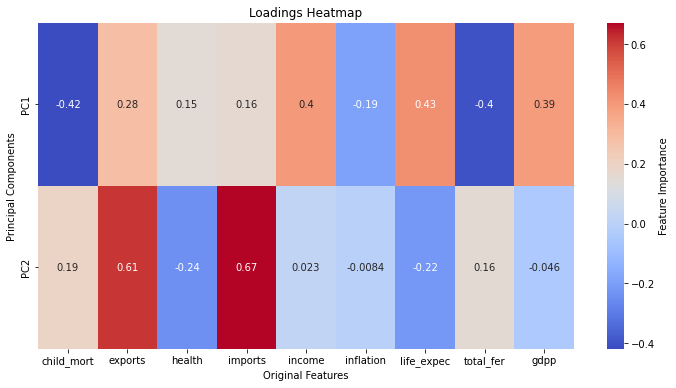

In [33]:
plt.figure(figsize=(12,6))

sns.heatmap(loadings, annot=True, cmap='coolwarm', cbar_kws={'label':'Feature Importance'}, xticklabels=features_names, yticklabels=['PC1','PC2'])

plt.xlabel('Original Features')
plt.ylabel('Principal Components')
plt.title('Loadings Heatmap')
plt.show()

# 5.) Plot a correlation plot of the original features. What do you notice between the graphs of 4 & 5?

[]

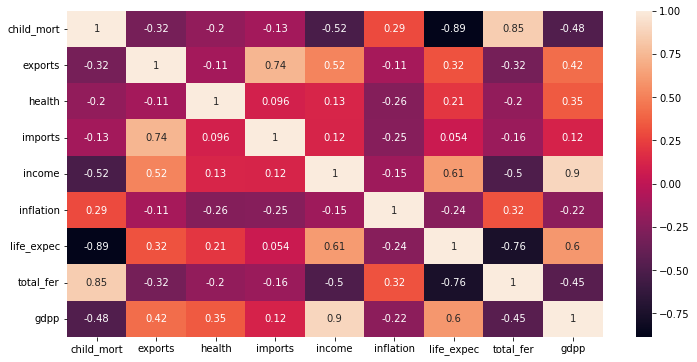

In [34]:
plt.figure(figsize=(12,6))
sns.heatmap(X.corr(), annot=True)
plt.plot()

we observe that highly correlated features were given high weight in constructing the principal components

# 6.) Run a PCA with 9 PCs. Plot a Cumulative Explained Variance Plot. How many PCs should we use if we want to retain 95% of the variance?

In [35]:
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)

In [36]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

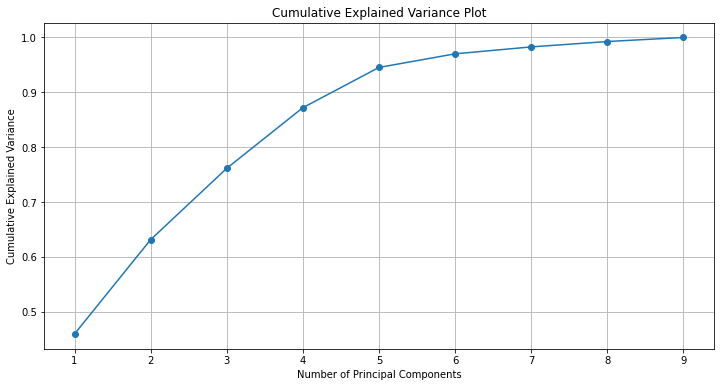

In [37]:
plt.figure(figsize=(12,6))

cumulative_explained_variance =  np.cumsum(pca.explained_variance_ratio_)

plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.grid()
plt.show()

In [38]:
cumulative_explained_variance

array([0.4595174 , 0.63133365, 0.76137624, 0.87190786, 0.94530998,
       0.97015232, 0.98275663, 0.99256944, 1.        ])

We can see that we need at least 6 principal components to retain at least 95% of the variance